In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
housePrices = pd.read_csv("property_prices.csv", delimiter =',')

In [3]:
housePrices.columns

Index(['id', 'price_bands', 'suburb', 'address', 'rooms', 'type', 'method',
       'realestate_agent', 'date', 'distance', 'postcode', 'bedrooms',
       'bathrooms', 'car_parks', 'landsize', 'building_area', 'year_built',
       'council_area', 'lattitude', 'longtitude', 'region_name',
       'suburb_property_count'],
      dtype='object')

In [4]:
#check for missing data (note i have some knowledge about this data anyway right now)
missingData = (housePrices.isnull().sum()/len(housePrices)) * 100
#now lets make a graph to see by dropping all values that == 0 and then sorting them
missingData = missingData.drop(missingData[missingData == 0].index).sort_values(ascending=False)[:30]
missingData = pd.DataFrame({'Missing Ratio' : missingData})
missingData.head(30)

,Missing Ratio
building_area,60.572675
year_built,55.382453
landsize,33.875595
car_parks,25.032995
bathrooms,23.592701
bedrooms,23.566879
longtitude,22.875423
lattitude,22.875423


 - building_area = Building size in Meters
 - year_built: Year the house was built
 - landsize: Land Size in Metres
 - car_parks: Number of carspots
 - bathroom: Number of Bathrooms
 - bedrooms: Number of Bedrooms
 - lattitude: Self explanitory
 - longtitude: Self explanitory
 
 Only numerical values seem missing

In [5]:
#First of all going to change the 0 to NaN so we can change them to the mean/median
missingColumns = ['building_area', 'landsize', 'car_parks', 'bathrooms', 'bedrooms']

for missInfo in missingColumns:
    housePrices[missInfo] = housePrices[missInfo].replace(0, np.nan)

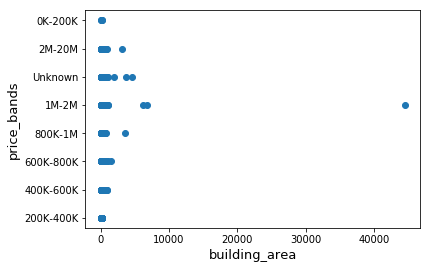

In [6]:
#outlier checking
fig, ax = plt.subplots()
ax.scatter(x = housePrices['building_area'], y = housePrices['price_bands'])
plt.ylabel('price_bands', fontsize=13)
plt.xlabel('building_area', fontsize=13)
plt.show()

In [7]:
#removing obvious outliers...note from later the tail end is so large we had to clip
housePrices = housePrices.drop(housePrices[(housePrices['building_area'] > 300)].index)

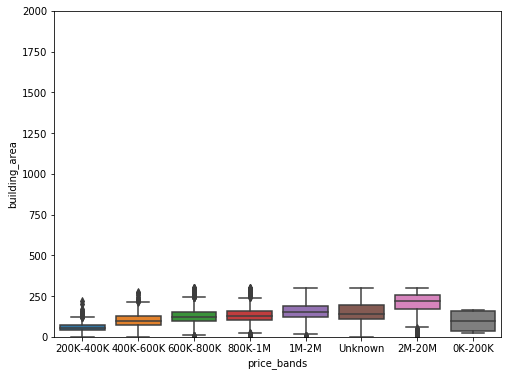

In [8]:
#box plot building_area/price_bands
data = pd.concat([housePrices['building_area'], housePrices['price_bands']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='price_bands', y="building_area", data=data)
fig.axis(ymin=0, ymax=2000);

Essentially shows that as the building area increases so does ther price, somewhat linear relation here.

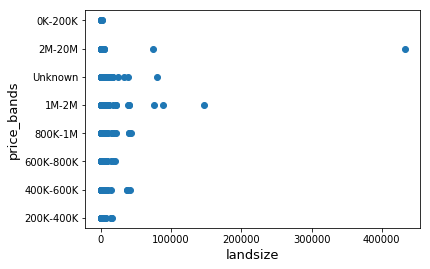

In [9]:
#outlier checking
fig, ax = plt.subplots()
ax.scatter(x = housePrices['landsize'], y = housePrices['price_bands'])
plt.ylabel('price_bands', fontsize=13)
plt.xlabel('landsize', fontsize=13)
plt.show()

In [10]:
#removing obvious outliers later on the tail end of the data is soooo long we clipped
housePrices = housePrices.drop(housePrices[(housePrices['landsize'] > 1200)].index)

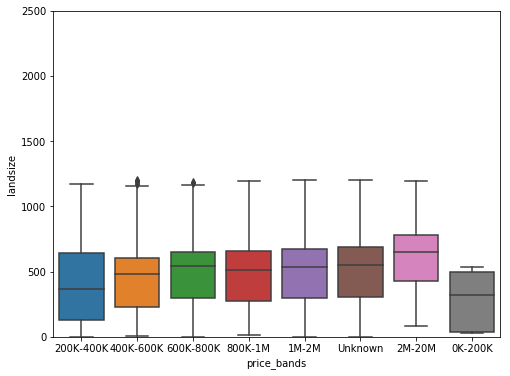

In [11]:
#box plot landsize/saleprice
data = pd.concat([housePrices['landsize'], housePrices['price_bands']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='price_bands', y="landsize", data=data)
fig.axis(ymin=0, ymax=2500);

Once again linear relation, could use this info to help compute missing information, outliers are quite large so median should be used here

Take a look at the ones we just did and group by land/building and median

In [12]:
#house prices grouped by building areas mean as we clipped the high outliers
housePrices.groupby(['price_bands'])['building_area'].mean()

price_bands
0K-200K      115.000000
1M-2M        157.993607
200K-400K     65.699518
2M-20M       209.889220
400K-600K    103.069153
600K-800K    129.508602
800K-1M      135.846234
Unknown      151.674565
Name: building_area, dtype: float64

In [13]:
#seems right, lets fill in the missing values now for building area
housePrices['building_area'].fillna(housePrices.groupby('price_bands')['building_area'].transform("mean"), inplace = True)

Do the same for Land size (legit no clue what difference is....)

In [14]:
#house prices grouped by building areas median due to high outliers and priceband
housePrices.groupby(['price_bands'])['landsize'].mean()

price_bands
0K-200K      284.600000
1M-2M        498.308824
200K-400K    416.048458
2M-20M       613.279931
400K-600K    451.431548
600K-800K    495.667841
800K-1M      481.912172
Unknown      516.610024
Name: landsize, dtype: float64

In [15]:
housePrices['landsize'].fillna(housePrices.groupby('price_bands')['landsize'].transform("mean"), inplace = True)

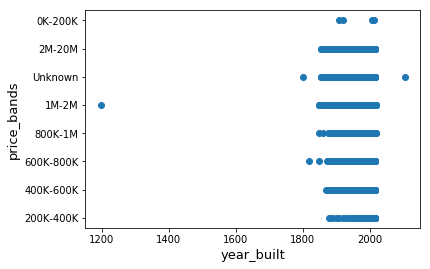

In [16]:
#outlier checking
fig, ax = plt.subplots()
ax.scatter(x = housePrices['year_built'], y = housePrices['price_bands'])
plt.ylabel('price_bands', fontsize=13)
plt.xlabel('year_built', fontsize=13)
plt.show()

In [17]:
housePrices = housePrices.drop(housePrices[(housePrices['year_built'] < 1600)].index)

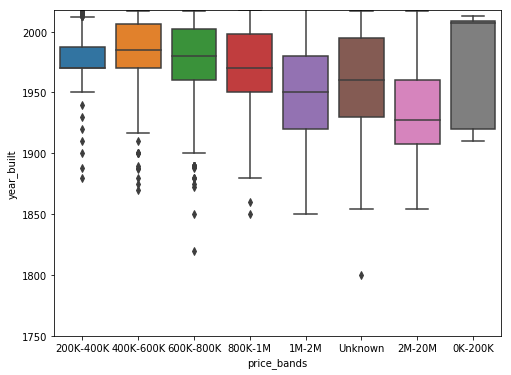

In [18]:
#box plot overallqual/saleprice
data = pd.concat([housePrices['year_built'], housePrices['price_bands']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='price_bands', y="year_built", data=data)
fig.axis(ymin=1750, ymax=2018);

In [19]:
#house prices grouped by building areas median due to high outliers and priceband
housePrices.groupby(['price_bands'])['year_built'].mean()

price_bands
0K-200K      1971.800000
1M-2M        1950.998689
200K-400K    1977.427975
2M-20M       1935.172554
400K-600K    1985.567338
600K-800K    1979.329670
800K-1M      1967.358539
Unknown      1959.161793
Name: year_built, dtype: float64

In [20]:
housePrices['year_built'].fillna(housePrices.groupby('price_bands')['year_built'].transform("mean"), inplace = True)

In [21]:
housePrices['year_built'] = housePrices['year_built'].round()

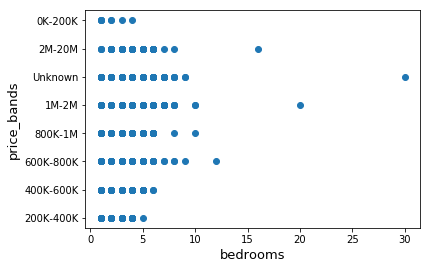

In [22]:
#outlier checking
fig, ax = plt.subplots()
ax.scatter(x = housePrices['bedrooms'], y = housePrices['price_bands'])
plt.ylabel('price_bands', fontsize=13)
plt.xlabel('bedrooms', fontsize=13)
plt.show()

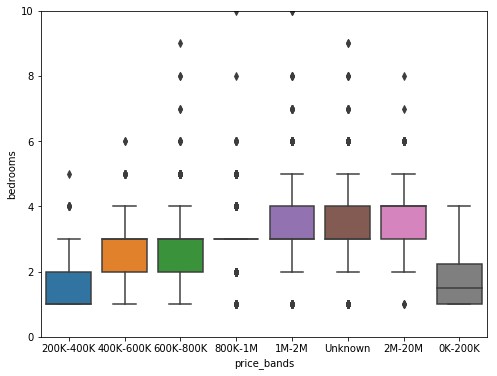

In [23]:
#box plot overallqual/saleprice
data = pd.concat([housePrices['bedrooms'], housePrices['price_bands']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='price_bands', y="bedrooms", data=data)
fig.axis(ymin=0, ymax=10);

linear trend with sale price, will use the mean as we removed high outliers and then round accordingly as the numbers are solid for this

In [24]:
#removing obvious outliers
housePrices = housePrices.drop(housePrices[(housePrices['bedrooms'] > 7)].index)

In [25]:
housePrices.groupby(['price_bands'])['bedrooms'].mean()

price_bands
0K-200K      1.875000
1M-2M        3.257248
200K-400K    1.598201
2M-20M       3.818047
400K-600K    2.516552
600K-800K    2.925377
800K-1M      3.026464
Unknown      3.165036
Name: bedrooms, dtype: float64

In [26]:
housePrices['bedrooms'].fillna(housePrices.groupby('price_bands')['bedrooms'].transform("mean"), inplace = True)
housePrices['bedrooms'] = housePrices['bedrooms'].round()

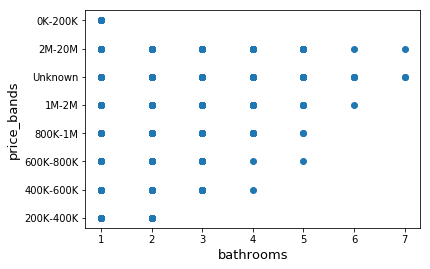

In [27]:
#outlier checking
fig, ax = plt.subplots()
ax.scatter(x = housePrices['bathrooms'], y = housePrices['price_bands'])
plt.ylabel('price_bands', fontsize=13)
plt.xlabel('bathrooms', fontsize=13)
plt.show()

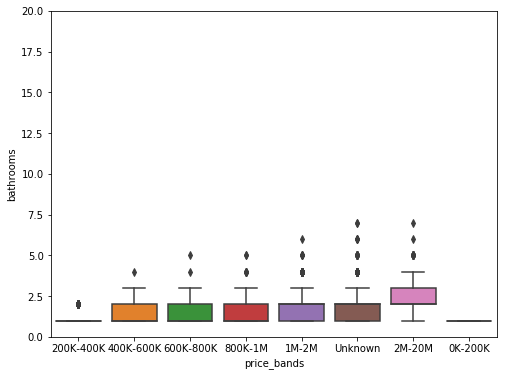

In [28]:
#box plot bathrooms/saleprice
data = pd.concat([housePrices['bathrooms'], housePrices['price_bands']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='price_bands', y="bathrooms", data=data)
fig.axis(ymin=0, ymax=20);

Lets leave the toilets for now, as the houses become more expensive, i don't see why you wouldnt have more toilets but over 5 seems a bit much. Not high outliers either so in this case we will grab the mean by grouped and round it

In [29]:
housePrices['bathrooms'].fillna(housePrices.groupby('price_bands')['bathrooms'].transform("mean"), inplace = True)
housePrices['bathrooms'] = housePrices['bathrooms'].round()

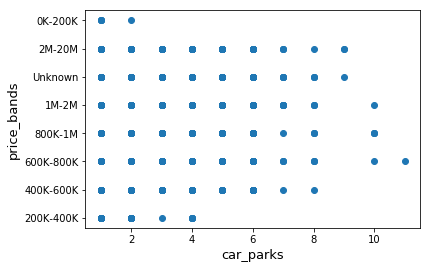

In [30]:
#outlier checking
fig, ax = plt.subplots()
ax.scatter(x = housePrices['car_parks'], y = housePrices['price_bands'])
plt.ylabel('price_bands', fontsize=13)
plt.xlabel('car_parks', fontsize=13)
plt.show()

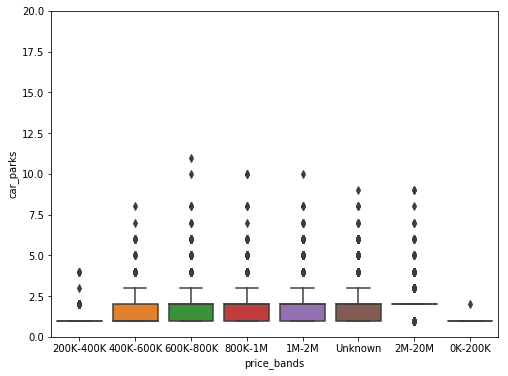

In [31]:
#box plot car_parks/saleprice
data = pd.concat([housePrices['car_parks'], housePrices['price_bands']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='price_bands', y="car_parks", data=data)
fig.axis(ymin=0, ymax=20);

This is a bit harder cause there is no real linear relation with price here. so having more garage spaces doesn't seem to affect the averages

In [32]:
housePrices['car_parks'].fillna(housePrices.groupby('price_bands')['car_parks'].transform("mean"), inplace = True)
housePrices['car_parks'] = housePrices['car_parks'].round()

In [33]:
#check for missing data (note i have some knowledge about this data anyway right now)
missingData = (housePrices.isnull().sum()/len(housePrices)) * 100
#now lets make a graph to see by dropping all values that == 0 and then sorting them
missingData = missingData.drop(missingData[missingData == 0].index).sort_values(ascending=False)[:30]
missingData = pd.DataFrame({'Missing Ratio' : missingData})
missingData.head(10)

,Missing Ratio
longtitude,23.880999
lattitude,23.880999


Can't do much about the longtitude and lattitude here with house locations so will probably end up removing these features

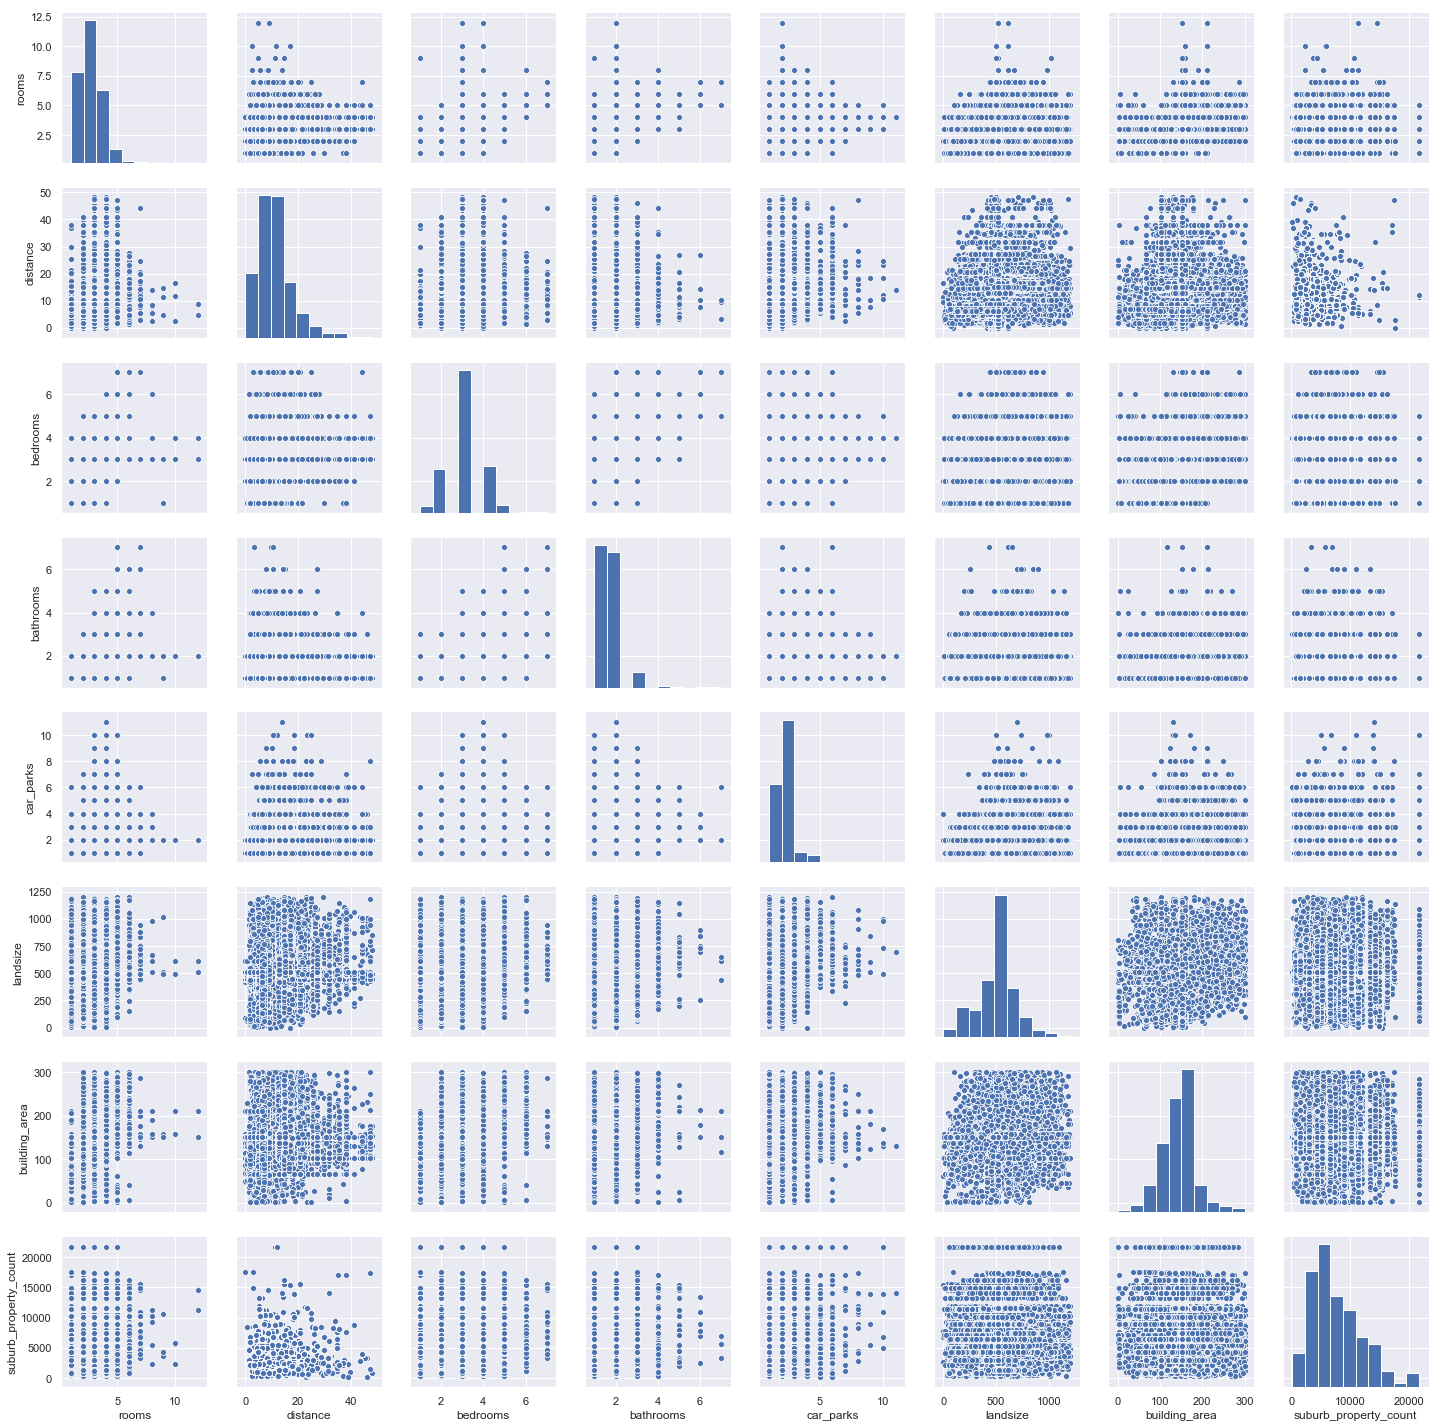

In [34]:
cols = ['rooms', 'distance','bedrooms','bathrooms', 'car_parks', 'landsize', 'building_area', 'suburb_property_count']
sns.set()
sns.pairplot(housePrices[cols], size = 2.5)
plt.show();

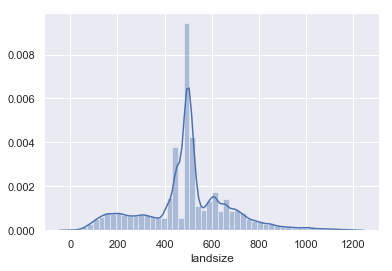

In [35]:
sns.distplot(housePrices['landsize'])

this is close enough to a Gaussian distribution. Normalize the data

In [36]:
housePrices['landsize'] = (housePrices['landsize'] - housePrices['landsize'].mean()) / housePrices['landsize'].std()

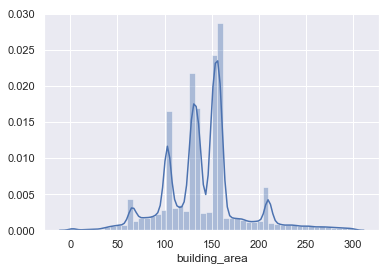

In [37]:
sns.distplot(housePrices['building_area'])

Doesn't follow a specific distribution, convert information into quantiles

In [38]:
numQuantiles = 30
def createQuantiles(dfColumn, numQuantiles):
    return pd.qcut(dfColumn, numQuantiles, labels=False, duplicates='drop')

In [39]:
housePrices['building_area'] = createQuantiles(housePrices['building_area'], numQuantiles)
housePrices.tail()

,id,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
34849,34850,Unknown,Yarraville,4/247 Williamstown Rd,3,townhouse,S,Jas,6/1/18,6.3,...,2.0,2.0,0.110757,11,1959.0,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543
34850,34851,Unknown,Yarraville,28 Regent St,3,house,SP,Biggin,3/2/18,6.3,...,1.0,2.0,-1.569631,3,1940.0,Maribyrnong City Council,-37.81209,144.88740,Western Metropolitan,6543
34851,34852,Unknown,Yarraville,17/40 Murray St,2,unit,SP,Biggin,17/2/18,6.3,...,2.0,2.0,0.110757,11,1959.0,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543
34852,34853,Unknown,Yarraville,4/20 Angliss St,2,house,S,hockingstuart,17/3/18,6.3,...,2.0,2.0,0.110757,11,1959.0,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543
34853,34854,Unknown,Yarraville,11 Cranbrook St,3,house,SN,Gunn&Co,17/3/18,6.3,...,1.0,4.0,-0.127472,11,1959.0,Maribyrnong City Council,-37.82326,144.87565,Western Metropolitan,6543


Quantile values range up to 30. Bring quantile values to the same scale as other feature data by scaling them to [0,1].

In [40]:
def minMaxScaler(numArr):
    minx = np.min(numArr)
    maxx = np.max(numArr)
    numArr = (numArr - minx) / (maxx - minx)
    return numArr

In [41]:
housePrices['building_area'] = minMaxScaler(housePrices['building_area'])

Remove features and what not, removing uknown band

In [42]:
housePrices = housePrices[~housePrices.price_bands.str.contains("Unknown")]

In [43]:
prices = housePrices['price_bands']
housePrices = housePrices.drop(['longtitude', 'lattitude', 'address', 'id', 'realestate_agent', 'date', 'price_bands'], axis=1)

In [44]:
housePrices.head(5)

,suburb,rooms,type,method,distance,postcode,bedrooms,bathrooms,car_parks,landsize,building_area,year_built,council_area,region_name,suburb_property_count
0,Abbotsford,1,unit,S,2.5,3067,1.0,1.0,1.0,-0.438583,0.000000,1977.0,Yarra City Council,Northern Metropolitan,4019
1,Abbotsford,1,unit,SP,3.0,3067,2.0,1.0,1.0,-0.438583,0.000000,1977.0,Yarra City Council,Northern Metropolitan,4019
2,Abbotsford,1,unit,S,3.0,3067,1.0,1.0,1.0,-0.245295,0.000000,2013.0,Yarra City Council,Northern Metropolitan,4019
3,Abbotsford,1,unit,VB,3.0,3067,3.0,1.0,1.0,-0.245295,0.176471,1986.0,Yarra City Council,Northern Metropolitan,4019
4,Abbotsford,1,unit,S,2.5,3067,3.0,1.0,1.0,-0.245295,0.176471,1986.0,Yarra City Council,Northern Metropolitan,4019


# Model

In [45]:
import sklearn as sk
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import preprocessing
import xgboost as xgb

In [46]:
#convert categorical to numerical
housePrices = pd.get_dummies(housePrices)

In [47]:
#splitting the size to 20% for training and testing purposes
trainX, testX, trainY, testY = train_test_split(np.array(housePrices), np.array(prices), test_size =0.3)

In [48]:
#Using Kfolds to split the data
kfold = KFold(n_splits= 15, shuffle=True, random_state=None)
for trainIndex, testIndex in kfold.split(trainX):
    xtrain, xtest, ytrain, ytest = np.array(trainX[trainIndex]), np.array(trainX[testIndex]), np.array(trainY[trainIndex]), np.array(trainY[testIndex])

# XGBoostClassifier

In [49]:
xgbclf = xgb.XGBClassifier(max_depth= 4, n_estimators= 300, learning_rate= 0.05)

In [50]:
#fitting the data and getting the predictions across the kfold split
xgbclf.fit(xtrain, ytrain)
prediction = xgbclf.predict(xtest)
#predicting on the remaining 20% data we have
xgbclfPred = xgbclf.predict(testX)

In [51]:
#accuracy, score and classification report for the Kfold split
print("Score")
print(metrics.accuracy_score(ytest, prediction))
print("")
print("Classification Report")
print(metrics.classification_report(ytest, prediction))
print("Confusion Matrix")
print(metrics.confusion_matrix(ytest, prediction))

Score
0.8992628992628993

Classification Report
              precision    recall  f1-score   support

       1M-2M       0.91      0.95      0.93       409
   200K-400K       0.98      0.88      0.93        57
      2M-20M       0.94      0.85      0.89        78
   400K-600K       0.88      0.95      0.91       201
   600K-800K       0.89      0.88      0.89       281
     800K-1M       0.85      0.81      0.83       195

   micro avg       0.90      0.90      0.90      1221
   macro avg       0.91      0.88      0.90      1221
weighted avg       0.90      0.90      0.90      1221

Confusion Matrix
[[388   0   4   1   2  14]
 [  0  50   0   6   1   0]
 [ 12   0  66   0   0   0]
 [  0   1   0 190  10   0]
 [  5   0   0  16 247  13]
 [ 20   0   0   2  16 157]]


In [52]:
#accuracy, score and classification report for the remaining 20% of data
print("Score")
print(metrics.accuracy_score(testY, xgbclfPred))
print("")
print("Classification Report")
print(metrics.classification_report(testY, xgbclfPred))
print("Confusion Matrix")
print(metrics.confusion_matrix(testY, xgbclfPred))

Score
0.9059317718940937

Classification Report
              precision    recall  f1-score   support

     0K-200K       1.00      0.50      0.67         4
       1M-2M       0.91      0.95      0.93      2618
   200K-400K       0.96      0.92      0.94       309
      2M-20M       0.90      0.87      0.88       483
   400K-600K       0.93      0.92      0.93      1331
   600K-800K       0.88      0.91      0.90      1736
     800K-1M       0.88      0.81      0.84      1375

   micro avg       0.91      0.91      0.91      7856
   macro avg       0.92      0.84      0.87      7856
weighted avg       0.91      0.91      0.91      7856

Confusion Matrix
[[   2    1    0    0    1    0    0]
 [   0 2483    0   47    4   21   63]
 [   0    0  284    0   24    1    0]
 [   0   61    0  420    0    0    2]
 [   0    2   12    0 1228   84    5]
 [   0   23    0    0   47 1585   81]
 [   0  148    1    0   10  101 1115]]


# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
forestCLF = RandomForestClassifier(n_estimators=300,criterion="entropy",max_depth=14, max_features="sqrt", warm_start=True)

In [55]:
#fitting the data and getting the predictions across the kfold split
forestCLF.fit(xtrain, ytrain)
prediction = forestCLF.predict(xtest)
#predicting on the remaining 20% data we have
forestCLFPred = forestCLF.predict(testX)

In [56]:
#accuracy, score and classification report for the Kfold split
print("Score")
print(metrics.accuracy_score(ytest, prediction))
print("")
print("Classification Report")
print(metrics.classification_report(ytest, prediction))
print("Confusion Matrix")
print(metrics.confusion_matrix(ytest, prediction))

Score
0.864045864045864

Classification Report
              precision    recall  f1-score   support

       1M-2M       0.83      0.97      0.89       409
   200K-400K       0.96      0.79      0.87        57
      2M-20M       1.00      0.59      0.74        78
   400K-600K       0.87      0.88      0.88       201
   600K-800K       0.86      0.90      0.88       281
     800K-1M       0.90      0.70      0.79       195

   micro avg       0.86      0.86      0.86      1221
   macro avg       0.90      0.81      0.84      1221
weighted avg       0.87      0.86      0.86      1221

Confusion Matrix
[[396   0   0   1   5   7]
 [  0  45   0  10   2   0]
 [ 32   0  46   0   0   0]
 [  1   1   0 177  20   2]
 [  9   1   0  10 254   7]
 [ 39   0   0   5  14 137]]


In [57]:
#accuracy, score and classification report for the remaining 20% of data
print("Score")
print(metrics.accuracy_score(testY, forestCLFPred))
print("")
print("Classification Report")
print(metrics.classification_report(testY, forestCLFPred))
print("Confusion Matrix")
print(metrics.confusion_matrix(testY, forestCLFPred))

Score
0.8559063136456212

Classification Report
              precision    recall  f1-score   support

     0K-200K       0.00      0.00      0.00         4
       1M-2M       0.83      0.97      0.89      2618
   200K-400K       0.96      0.78      0.86       309
      2M-20M       0.95      0.57      0.71       483
   400K-600K       0.90      0.88      0.89      1331
   600K-800K       0.83      0.89      0.86      1736
     800K-1M       0.88      0.70      0.78      1375

   micro avg       0.86      0.86      0.86      7856
   macro avg       0.76      0.68      0.71      7856
weighted avg       0.86      0.86      0.85      7856

Confusion Matrix
[[   0    1    3    0    0    0    0]
 [   0 2533    0   15    3   31   36]
 [   0    1  242    0   61    5    0]
 [   0  208    0  274    0    0    1]
 [   0    0    7    0 1168  147    9]
 [   0   58    0    0   51 1543   84]
 [   0  253    0    0   20  138  964]]


# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
CLF = DecisionTreeClassifier(max_depth=10, random_state=0, min_samples_split=2)

In [60]:
#fitting the data and getting the predictions across the kfold split
CLF.fit(xtrain, ytrain)
prediction = CLF.predict(xtest)
#predicting on the remaining 20% data we have
CLFPred = CLF.predict(testX)

In [61]:
#accuracy, score and classification report for the Kfold split
print("Score")
print(metrics.accuracy_score(ytest, prediction))
print("")
print("Classification Report")
print(metrics.classification_report(ytest, prediction))
print("Confusion Matrix")
print(metrics.confusion_matrix(ytest, prediction))

Score
0.8714168714168714

Classification Report
              precision    recall  f1-score   support

       1M-2M       0.87      0.92      0.90       409
   200K-400K       0.98      0.82      0.90        57
      2M-20M       0.91      0.79      0.85        78
   400K-600K       0.91      0.91      0.91       201
   600K-800K       0.87      0.89      0.88       281
     800K-1M       0.80      0.75      0.77       195

   micro avg       0.87      0.87      0.87      1221
   macro avg       0.89      0.85      0.87      1221
weighted avg       0.87      0.87      0.87      1221

Confusion Matrix
[[378   0   6   3   5  17]
 [  1  47   0   6   3   0]
 [ 16   0  62   0   0   0]
 [  1   1   0 182  13   4]
 [  9   0   0   7 249  16]
 [ 29   0   0   3  17 146]]


In [62]:
#accuracy, score and classification report for the remaining 20% of data
print("Score")
print(metrics.accuracy_score(testY, CLFPred))
print("")
print("Classification Report")
print(metrics.classification_report(testY, CLFPred))
print("Confusion Matrix")
print(metrics.confusion_matrix(testY, CLFPred))

Score
0.8620162932790224

Classification Report
              precision    recall  f1-score   support

     0K-200K       0.00      0.00      0.00         4
       1M-2M       0.87      0.92      0.90      2618
   200K-400K       0.92      0.87      0.90       309
      2M-20M       0.85      0.82      0.83       483
   400K-600K       0.92      0.86      0.89      1331
   600K-800K       0.84      0.87      0.85      1736
     800K-1M       0.81      0.76      0.78      1375

   micro avg       0.86      0.86      0.86      7856
   macro avg       0.74      0.73      0.74      7856
weighted avg       0.86      0.86      0.86      7856

Confusion Matrix
[[   0    1    2    0    0    0    1]
 [   0 2417    0   65    3   32  101]
 [   0    2  270    1   28    4    4]
 [   0   86    1  394    0    1    1]
 [   0   10   17    1 1141  134   28]
 [   0   59    1    0   57 1507  112]
 [   0  204    2    0   13  113 1043]]


# Review

Considering the dataset was manipulated prior the data set having categorical in this case isn't that great but through some cleaning the end results weren't bad. Considering that some of the miss classifications were due to being a price band higher or lower than its stated one, shows that numerically those houses may be close to the upper or lower bands of the given price.
Running Decision trees is a cheap and effeective way for this problem.